# [A Basic Two-Agent Conversation Example](https://microsoft.github.io/autogen/docs/Use-Cases/agent_chat/#multi-agent-conversations)

Once the participating agents are constructed properly, one can start a multi-agent conversation session by an initialization step as shown in the following code.
You can chat with the agent using the pop-up in the upper side of the screen. To end type 'exit'

In [48]:
%pip install pyautogen

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import autogen
import logging
import os

from autogen import AssistantAgent, UserProxyAgent

## Example 1: Basic Two Agents Interaction

This example demonstrates how to set up a basic interaction between two agents using the AutoGen framework. The setup involves creating an assistant agent and a user proxy agent, then initiating a chat between them with a specific task.

### [Understanding AutoGen Agents](https://microsoft.github.io/autogen/docs/Use-Cases/agent_chat/#agents)

AutoGen introduces a novel approach to task-solving through conversable agents. These agents are designed with key features to facilitate seamless interactions:

- **Conversable**: Agents in AutoGen are conversable, which means that any agent can send and receive messages from other agents to initiate or continue a conversation.
- **Customizable**: Customizable: Agents in AutoGen can be customized to integrate LLMs, humans, tools, or a combination of them.

#### Built-in Agents in AutoGen

AutoGen features built-in agents, each with unique capabilities to contribute to task-solving through inter-agent communication. The framework is anchored by the `ConversableAgent` class, which lays the foundation for agents to exchange messages and collaborate on tasks. Two primary subclasses derived from this are the `AssistantAgent` and the `UserProxyAgent`.

- **AssistantAgent**: This agent acts as an AI assistant, primarily utilizing LLMs (e.g., GPT-4o) to generate Python code or other responses based on received messages. It is designed to operate without human input, focusing on code generation and suggesting corrections or enhancements. The behavior and LLM inference of the AssistantAgent can be customized through the `[llm_config]` parameter.

- **UserProxyAgent**: Serving as a proxy for human interaction, this agent solicits human input for each turn of the conversation by default. It possesses the capability to execute code and invoke functions or tools autonomously, especially when executable code blocks are identified in the conversation. The `UserProxyAgent` can be configured to disable code execution or enable LLM-based responses, providing flexibility in how it interacts and responds within the AutoGen framework.

### Agent Chat Example

The interaction between an `AssistantAgent` and a `UserProxyAgent` exemplifies the collaborative and conversational dynamics of AutoGen's agent-based approach. By leveraging the distinct capabilities of each agent, AutoGen facilitates a comprehensive environment for solving tasks through agent collaboration and conversation.

In [ ]:
# Step 1: Load Configuration. First, we load the configuration for the assistant agent from a JSON file named `OAI_CONFIG_LIST`.

config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST",
)

#Step 2: Create the Assistant Agent
# Then, create the assistant agent with the config list
assistant = autogen.AssistantAgent(name="assistant", llm_config={"config_list": config_list})

#Step 3: Create the User Proxy Agent
user_proxy = UserProxyAgent(
    "user_proxy", code_execution_config={"work_dir": "coding", "use_docker": False}
)

#Step 4: Start the Chat
# Start the chat
user_proxy.initiate_chat(
    assistant,
    message="Plot a chart of NVDA and TESLA stock price change YTD.",
)

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot the chart of Nvidia (NVDA) and Tesla (TSLA) stock price changes year-to-date (YTD), we will:

1. Collect the YTD stock price data for both NVDA and TSLA.
2. Plot the data using a suitable plotting library such as matplotlib or Plotly in Python.

We will achieve this using the `yfinance` library to fetch the stock data and `matplotlib` to plot the chart. 

Here is the code to do it:

```python
# filename: plot_stock_prices.py
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

# Define the tickers and start date
tickers = ['NVDA', 'TSLA']
start_date = datetime.date.today().replace(month=1, day=1).strftime('%Y-%m-%d')
end_date = datetime.date.today().strftime('%Y-%m-%d')

# Fetch the stock data
nvda = yf.download('NVDA', start=start_date, end=end_date)
tsla = yf.download(

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a chart of NVDA and TESLA stock price change YTD.', 'role': 'assistant'}, {'content': "To plot the chart of Nvidia (NVDA) and Tesla (TSLA) stock price changes year-to-date (YTD), we will:\n\n1. Collect the YTD stock price data for both NVDA and TSLA.\n2. Plot the data using a suitable plotting library such as matplotlib or Plotly in Python.\n\nWe will achieve this using the `yfinance` library to fetch the stock data and `matplotlib` to plot the chart. \n\nHere is the code to do it:\n\n```python\n# filename: plot_stock_prices.py\nimport yfinance as yf\nimport matplotlib.pyplot as plt\nimport datetime\n\n# Define the tickers and start date\ntickers = ['NVDA', 'TSLA']\nstart_date = datetime.date.today().replace(month=1, day=1).strftime('%Y-%m-%d')\nend_date = datetime.date.today().strftime('%Y-%m-%d')\n\n# Fetch the stock data\nnvda = yf.download('NVDA', start=start_date, end=end_date)\ntsla = yf.download('TSLA', start=start_date, e

## Example 2 - Local Code Execution

In [ ]:
%pip install -qqq matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tempfile
import autogen

from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor


In [5]:
# You can filter configurations when loading them into config list.
filter_dict = {"model": ["gpt-4o"]}

config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST",
    filter_dict=filter_dict,
)

In [8]:
# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="NEVER",  # Always/Never take human input for this agent for safety.
)


# The code writer agent's system message is to instruct the LLM on how to use
# the code executor in the code executor agent.
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""

code_writer_agent = ConversableAgent(
    "code_writer_agent",
    system_message=code_writer_system_message,
    llm_config={"config_list": config_list},
    code_execution_config=False,  # Turn off code execution for this agent.
)

In [9]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="Write Python code to calculate the 14th Fibonacci number.",
)

code_executor_agent (to code_writer_agent):

Write Python code to calculate the 14th Fibonacci number.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

Sure! Here is a Python script that calculates the 14th Fibonacci number:

```python
# filename: fibonacci_14.py

def fibonacci(n):
    if n <= 0:
        return "Input should be a positive integer"
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        a, b = 0, 1
        for _ in range(n - 2):
            a, b = b, a + b
        return b

# Calculate the 14th Fibonacci number
fourteenth_fibonacci = fibonacci(14)
print("The 14th Fibonacci number is:", fourteenth_fibonacci)
```

You can save this code in a file named `fibonacci_14.py` and then execute it. The result will print the 14th Fibonacci number.

--------------------------------------------------------------------------------

>>>>>>>> EXECUTI

## Example 3 -  Querying the Web

In [51]:
import datetime

filter_dict = {"model": ["gpt-4o"]}

config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST",
    filter_dict=filter_dict,
)
# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir="stocks",  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="NEVER",  # Always/Never take human input for this agent for safety.
)


today = datetime.datetime.now().strftime("%Y-%m-%d")
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="Today is {today}. Write Python code to plot the top 10 tech stocks price gains YTD, and save the plot to a file named 'stock_gains.png'. Make the visual as modern as possible",
)

code_executor_agent (to code_writer_agent):

Today is {today}. Write Python code to plot the top 10 tech stocks price gains YTD, and save the plot to a file named 'stock_gains.png'. Make the visual as modern as possible

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

To accomplish this task, you'll need to follow these steps:

1. Fetch the current date.
2. Retrieve or scrape the stock price data for top 10 tech stocks.
3. Calculate the Year-To-Date (YTD) gains for these stocks.
4. Create a bar plot to visualize the gains.
5. Save the plot to a file.

To retrieve stock data, we can utilize financial data APIs such as Alpha Vantage or Yahoo Finance. For this example, I will use the `yfinance` library, which is a popular library to fetch financial data through Yahoo Finance.

Let's implement this step-by-step:

**Step 1: Fetch the current date**
**Step 2: Retrieve or scrape the sto

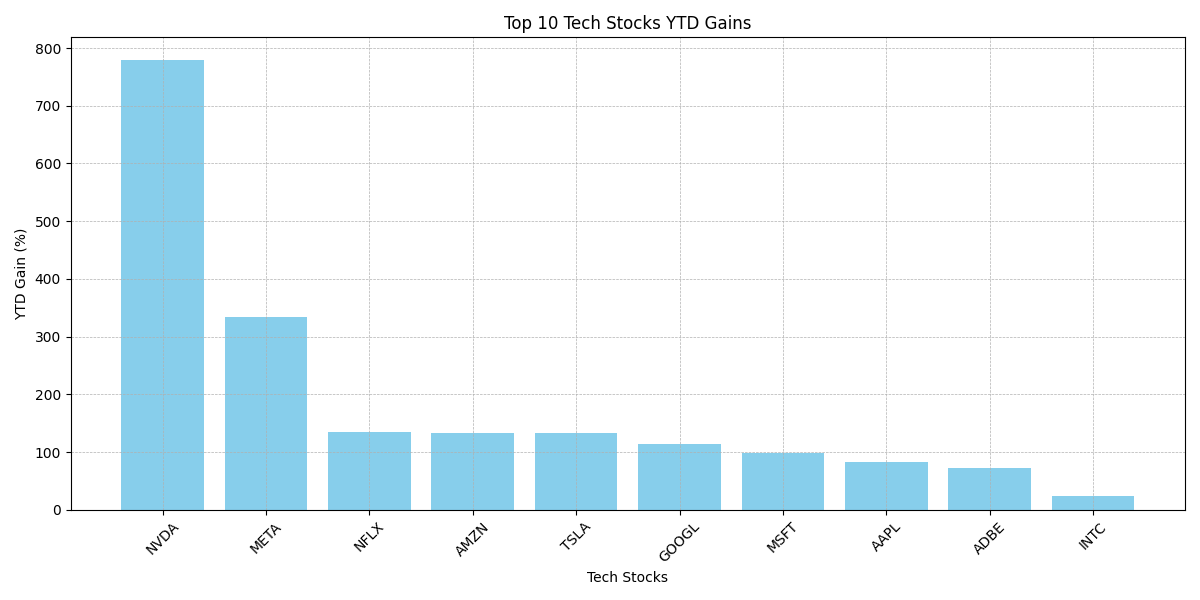

In [54]:
from IPython.display import Image
Image(os.path.join("stocks/", "stock_gains.png"))